## 🔧 **Importación de librerías**

In [1]:
!pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable


In [2]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature.texture import graycomatrix, graycoprops
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import random





## 📥 **Variables de entorno**

In [3]:

carpeta_preprocesadas = '../data/preprocesadas/'
train_normal =carpeta_preprocesadas+'train/NORMAL/'
train_pneumonia =carpeta_preprocesadas+'train/PNEUMONIA/'
test_normal =carpeta_preprocesadas+'test/NORMAL/'
test_pneumonia =carpeta_preprocesadas+'test/PNEUMONIA/'
val_normal =carpeta_preprocesadas+'val/NORMAL/'
val_pneumonia =carpeta_preprocesadas+'val/PNEUMONIA/'
dir_train =carpeta_preprocesadas+'train/'
dir_test =carpeta_preprocesadas+'test/'
dir_val =carpeta_preprocesadas+'val/'
salida_caracteristicas = 'data/caracteristicas/'

## 📥 **Cargar imagenes y visualizar**

Seleccionamos 3 imágenes al azar de cada categoría 

In [4]:
#display 2x3 con 3 imagenes al azar de nuemonia y 3 de normal del set de train

# Seleccionar 3 imágenes al azar de cada categoría  
normal_images = os.listdir(train_normal)
neumonia_images = os.listdir(train_pneumonia)
random_normal_images = random.sample(normal_images, 3)
random_neumonia_images = random.sample(neumonia_images, 3)

cell_size = (8, 8)
block_size = (16, 16)
block_stride = (8, 8)
num_bins = 9




## ✨ **1. Momentos de Hu**
Los Momentos de Hu son 7 valores derivados de momentos invariantes de la imagen, los cuales son:
- Invariantes a **traslación**
- Invariantes a **rotación**
- Invariantes a **escala**

El séptimo momento también es sensible a reflexiones.


In [5]:
def extraer_momentos_hu(img_gray):
    # Asegurar que sea uint8
    img_gray = img_gray.astype("uint8")

    # 1) Suavizado
    blur = cv2.GaussianBlur(img_gray, (5,5), 0)

    # 2) Binarización Otsu
    _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # 3) Momentos
    M = cv2.moments(thresh)
    hu = cv2.HuMoments(M).flatten()

    # 4) Log-transform
    hu_log = [-np.sign(h) * np.log10(abs(h)) if h != 0 else 0 for h in hu]

    return hu_log, thresh



### 🔍 **Visualización del contorno utilizado en los momentos**


==================== MOMENTOS DE HU ====================

[NORMAL] Imagen: IM-0627-0001.jpeg
  Hu_log[1] = 3.098837
  Hu_log[2] = 8.639671
  Hu_log[3] = 11.283352
  Hu_log[4] = 12.823047
  Hu_log[5] = 25.426308
  Hu_log[6] = 17.409260
  Hu_log[7] = -24.894213
-----------------------------------------------------

[NORMAL] Imagen: NORMAL2-IM-0649-0001.jpeg
  Hu_log[1] = 3.148505
  Hu_log[2] = 9.008428
  Hu_log[3] = 12.497834
  Hu_log[4] = 13.194267
  Hu_log[5] = -26.184329
  Hu_log[6] = 17.700529
  Hu_log[7] = 26.197537
-----------------------------------------------------

[NORMAL] Imagen: NORMAL2-IM-1294-0001-0002.jpeg
  Hu_log[1] = 3.083809
  Hu_log[2] = 8.004022
  Hu_log[3] = 12.373838
  Hu_log[4] = 11.895207
  Hu_log[5] = -24.819161
  Hu_log[6] = -15.953894
  Hu_log[7] = 24.035533
-----------------------------------------------------

[NEUMONÍA] Imagen: person23_bacteria_104.jpeg
  Hu_log[1] = 3.096244
  Hu_log[2] = 7.118305
  Hu_log[3] = 10.653970
  Hu_log[4] = 11.807208
  Hu_log

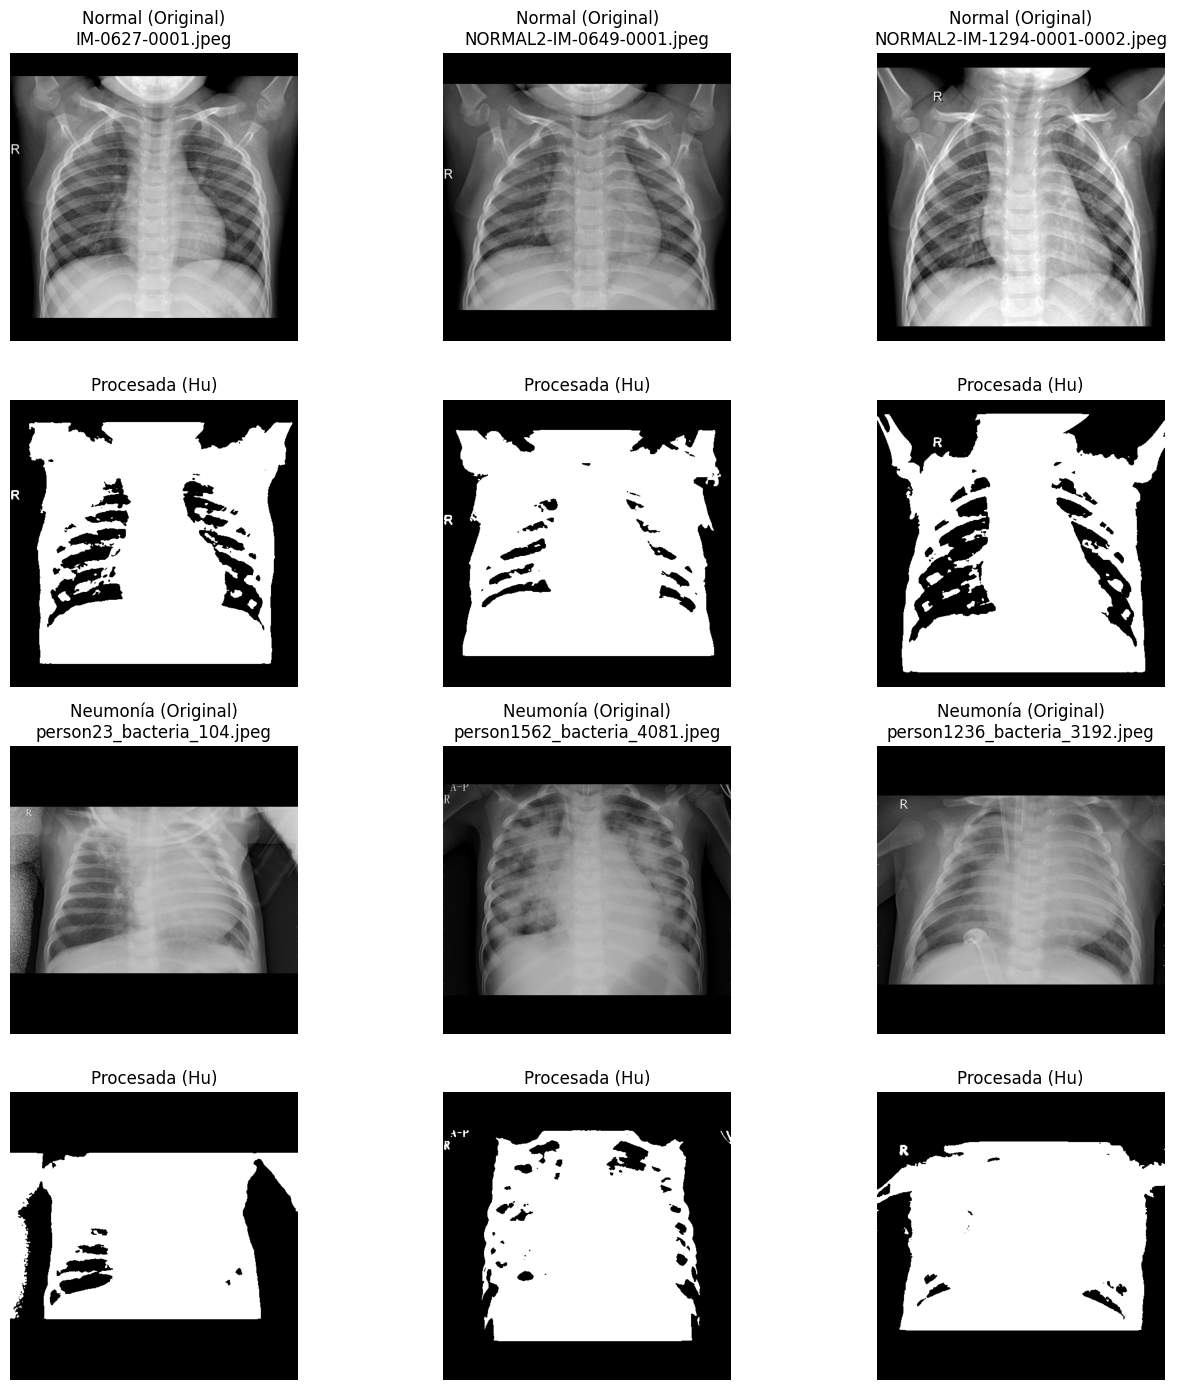

In [7]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

def extraer_momentos_hu(img_gray):
    img_gray = img_gray.astype("uint8")

    blur = cv2.GaussianBlur(img_gray, (5,5), 0)
    _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    M = cv2.moments(thresh)
    hu = cv2.HuMoments(M).flatten()

    hu_log = [-np.sign(h)*np.log10(abs(h)) if h != 0 else 0 for h in hu]

    return hu_log, thresh


def mostrar_comparacion_original_vs_hu(train_normal, train_pneumonia):

    random_normal = random.sample(os.listdir(train_normal), 3)
    random_pneumonia = random.sample(os.listdir(train_pneumonia), 3)

    fig, axes = plt.subplots(4, 3, figsize=(14, 14))  

    print("\n==================== MOMENTOS DE HU ====================\n")  # <-- agregado

    # ---------------- NORMAL ----------------
    for i, img_name in enumerate(random_normal):
        path = os.path.join(train_normal, img_name)
        img = np.array(Image.open(path).convert("L"))

        hu, thresh = extraer_momentos_hu(img)

        # ---- impresión en consola ----  <-- agregado
        print(f"[NORMAL] Imagen: {img_name}")
        for j in range(7):
            print(f"  Hu_log[{j+1}] = {hu[j]:.6f}")
        print("-----------------------------------------------------\n")

        # Original
        axes[0, i].imshow(img, cmap="gray")
        axes[0, i].set_title(f"Normal (Original)\n{img_name}")
        axes[0, i].axis("off")

        # Procesada
        axes[1, i].imshow(thresh, cmap="gray")
        axes[1, i].set_title("Procesada (Hu)")
        axes[1, i].axis("off")

    # ---------------- NEUMONÍA ----------------
    for i, img_name in enumerate(random_pneumonia):
        path = os.path.join(train_pneumonia, img_name)
        img = np.array(Image.open(path).convert("L"))

        hu, thresh = extraer_momentos_hu(img)

        # ---- impresión en consola ----  <-- agregado
        print(f"[NEUMONÍA] Imagen: {img_name}")
        for j in range(7):
            print(f"  Hu_log[{j+1}] = {hu[j]:.6f}")
        print("-----------------------------------------------------\n")

        # Original
        axes[2, i].imshow(img, cmap="gray")
        axes[2, i].set_title(f"Neumonía (Original)\n{img_name}")
        axes[2, i].axis("off")

        # Procesada
        axes[3, i].imshow(thresh, cmap="gray")
        axes[3, i].set_title("Procesada (Hu)")
        axes[3, i].axis("off")

    plt.tight_layout()
    plt.show()

# EJECUCIÓN
mostrar_comparacion_original_vs_hu(train_normal, train_pneumonia)


✅ **1. ¿Qué son los Momentos de Hu?**

Los Momentos de Hu (Hu Moments) son 7 valores que describen la forma de un objeto en una imagen mediante combinaciones de momentos centrales normalizados.

Son un descriptor clásico de visión por computador y se usan para:

✔ Reconocimiento de formas
✔ Detección de patrones
✔ Clasificación
✔ Búsqueda de similitudes

Son robustos incluso cuando la forma está rotada, trasladada o escalada.

✅ **2. Invarianzas que proporcionan**

Hu definió 7 funciones matemáticas de los momentos que son:

🔸 Invariantes a traslación

Si el objeto se mueve en la imagen, los valores permanecen iguales.

🔸 Invariantes a escala

Si el objeto se hace más grande o más pequeño, los valores no cambian.

🔸 Invariantes a rotación

Si el objeto se rota en cualquier ángulo, los valores son prácticamente iguales.

🔸 (Opcional según tratamiento) Robustos a ruido

La versión log-transformada mejora estabilidad frente a ruido y diferencias de iluminación.

✅ **3. Interpretación general de los valores**

Cada momento describe un aspecto distinto de la forma:

Momento	Describe principalmente…
Hu1	Distribución global del área (momento de inercia)
Hu2	Simetría respecto a ejes principales
Hu3	Asimetría o inclinación
Hu4–Hu6	Complejidad, elongación, curvaturas y patrones internos
Hu7	Simetría de orden superior (sensible a aspectos muy finos de la forma)

Valores altos → más complejidad / irregularidad
Valores bajos → formas más simples / simétricas

✅ **4. Explicación de los resultados**


🟦 NORMAL (3 ejemplos)
Observaciones en tus valores:

✔ En general, los momentos de Hu para NORMAL son más estables
✔ Hu2, Hu3, Hu4 son relativamente parecidos entre imágenes
✔ Algunos valores extremos (Hu5 y Hu7) cambian de signo → eso es normal porque Hu usa transformaciones que pueden depender de orientación interna de regiones blancas/negra.

Interpretación:

Las radiografías normales tienen estructura más regular y simétrica en la región pulmonar.

La silueta de los pulmones tiende a ser más consistente entre individuos sanos.

La binarización genera áreas más homogéneas, por eso los momentos no se disparan tanto.

Conclusión:

👉 Los momentos de Hu para NORMAL tienden a tener menor variabilidad y representar formas más consistentes.

🟥 NEUMONÍA (3 ejemplos)

Observaciones:

✔ Algunos momentos (especialmente Hu2, Hu3, Hu5, Hu7) son mucho más altos o más bajos
✔ Mayor dispersión entre imágenes
✔ Algunos valores tienen magnitudes más extremas

Interpretación:

La neumonía introduce:

opacidades irregulares

parches difusos

patrones no simétricos

zonas blancas que cambian la distribución de forma

Esto rompe la simetría pulmonar, y los momentos de Hu lo capturan.

Conclusión:

👉 Las radiografías con neumonía producen momentos más inestables, dispersos y con valores más extremos, lo que indica irregularidad en la estructura.

🔍 **5. Comparación directa NORMAL vs NEUMONÍA**

A partir de tus resultados:

Hu1 (distribución del área)

Valores muy parecidos en todas las imágenes.
👉 No discrimina mucho entre clases.

Hu2 (simetría global)

Normal: ~8.0 – 9.0

Neumonía: ~7.1 – 9.2

👉 La variabilidad es mayor en NEUMONÍA.
👉 Puede ser útil como característica.

Hu3 y Hu4 (asimetría y complejidad)

Normal: 11–13

Neumonía: 10–13

👉 Muy similares, pero más estables en NORMAL
👉 Neumonía muestra más variación interna

Hu5, Hu7 (sensibles a patrones finos)

Aquí está la clave:

Normal:

valores tipo ±24 a ±26 (pero consistentes)

Neumonía:

±23 a ±26 (más dispersos, algunos más extremos)

👉 Estos momentos registran irregularidad interna, muy característica de la neumonía.

🧠 **6. Conclusión global**
✔ Los Momentos de Hu SÍ capturan diferencias entre NORMAL y NEUMONÍA.
✔ Los pulmones normales tienen momentos:

más estables

menos dispersos

más simétricos

✔ Las imágenes con neumonía presentan:

mayor irregularidad

cambios drásticos en Hu5 y Hu7

mayor variabilidad entre casos

Por lo tanto…

⭐ Los Momentos de Hu pueden servir como un descriptor útil para clasificar NORMAL vs NEUMONÍA, aunque normalmente se utilizan junto con otros descriptores o directamente CNNs.


## 🧱 **2. Gray Level Co-occurrence Matrix (GLCM)**
GLCM analiza **cómo se relacionan los niveles de gris** según distancia y orientación.

Propiedades que calculamos:
- **Contraste**
- **Correlación**
- **Energía**
- **Homogeneidad**


In [8]:
import sys
import skimage
print("Python:", sys.version)
print("scikit-image:", skimage.__version__)





Python: 3.13.1 (tags/v3.13.1:0671451, Dec  3 2024, 19:06:28) [MSC v.1942 64 bit (AMD64)]
scikit-image: 0.25.2


## 🧱 **Creamos nuestras propias funciones para GLCM**
Esto debido a que en nuestra version de python las funciones para realizar ese proceso fueron descontinuadas.



In [9]:
import numpy as np

def glcm_matrix(img, distance=1, angle=0, levels=256):
    rows, cols = img.shape
    glcm = np.zeros((levels, levels), dtype=np.float64)

    # Direcciones
    dx = int(round(np.cos(angle) * distance))
    dy = int(round(np.sin(angle) * distance))

    for i in range(rows):
        for j in range(cols):
            x = i + dy
            y = j + dx
            if 0 <= x < rows and 0 <= y < cols:
                glcm[img[i,j], img[x,y]] += 1

    glcm /= glcm.sum()
    return glcm


def glcm_props(glcm):
    i, j = np.indices(glcm.shape)

    contrast = np.sum(glcm * (i - j)**2)
    energy = np.sum(glcm**2)
    homogeneity = np.sum(glcm / (1 + np.abs(i - j)))

    μ_i = np.sum(i * glcm)
    μ_j = np.sum(j * glcm)
    σ_i = np.sqrt(np.sum((i - μ_i)**2 * glcm))
    σ_j = np.sqrt(np.sum((j - μ_j)**2 * glcm))

    if σ_i == 0 or σ_j == 0:
        correlation = 1
    else:
        correlation = np.sum(((i - μ_i) * (j - μ_j) * glcm) / (σ_i * σ_j))

    return contrast, correlation, energy, homogeneity


def compute_glcm_features(img, distances=[1, 3, 5],
                          angles=[0, np.pi/4, np.pi/2, 3*np.pi/4]):
    img = img.astype(np.uint8)
    results = []

    for d in distances:
        for a in angles:
            glcm = glcm_matrix(img, distance=d, angle=a, levels=256)
            props = glcm_props(glcm)
            results.append({
                "distance": d,
                "angle": a,
                "contrast": props[0],
                "correlation": props[1],
                "energy": props[2],
                "homogeneity": props[3]
            })

    return results



## 🧱 **Proceso de calculo para cada una de las imagenes con GLCM**
Este script nos proporciona el calculo de propiedades: contraste, correlación, energía, homogeneidad. 
Realizadas en diferentes direcciones y distancias como se pidio en el trabajo.

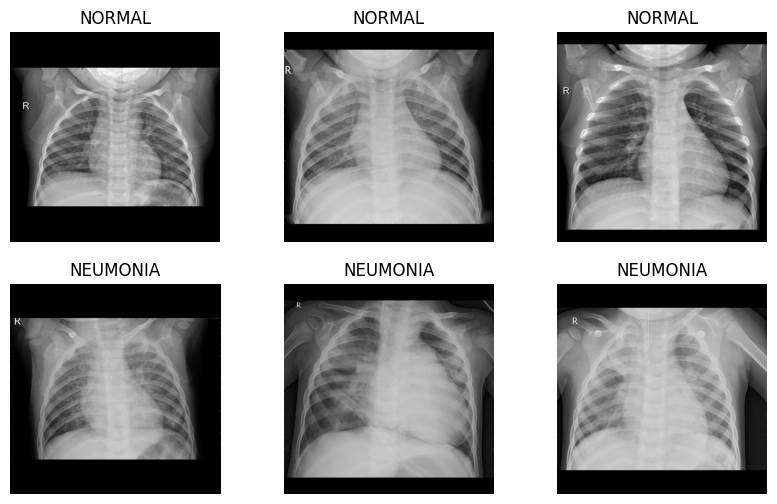


======= PROPIEDADES GLCM =======

Imagen: IM-0676-0001.jpeg | Clase: NORMAL
Dist=1, Ang=0 | Contrast=27.3936, Correlation=0.9976, Energy=0.1506, Homogeneity=0.6232
Dist=1, Ang=0.79 | Contrast=140.4939, Correlation=0.9875, Energy=0.1438, Homogeneity=0.5731
Dist=1, Ang=1.57 | Contrast=119.4707, Correlation=0.9894, Energy=0.1459, Homogeneity=0.6255
Dist=1, Ang=2.36 | Contrast=143.6937, Correlation=0.9872, Energy=0.1437, Homogeneity=0.5731
Dist=3, Ang=0 | Contrast=132.1469, Correlation=0.9882, Energy=0.1458, Homogeneity=0.5286
Dist=3, Ang=0.79 | Contrast=309.7556, Correlation=0.9724, Energy=0.1431, Homogeneity=0.5245
Dist=3, Ang=1.57 | Contrast=401.3185, Correlation=0.9643, Energy=0.1431, Homogeneity=0.5385
Dist=3, Ang=2.36 | Contrast=315.4338, Correlation=0.9719, Energy=0.1430, Homogeneity=0.5251
Dist=5, Ang=0 | Contrast=226.3668, Correlation=0.9798, Energy=0.1419, Homogeneity=0.4965
Dist=5, Ang=0.79 | Contrast=624.9299, Correlation=0.9443, Energy=0.1360, Homogeneity=0.4770
Dist=5, Ang=1

In [10]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. Funciones GLCM sin scikit-image (para Python 3.13)
# -----------------------------
def glcm_matrix(img, distance=1, angle=0, levels=256):
    rows, cols = img.shape
    glcm = np.zeros((levels, levels), dtype=np.float64)

    dx = int(round(np.cos(angle) * distance))
    dy = int(round(np.sin(angle) * distance))

    for i in range(rows):
        for j in range(cols):
            x = i + dy
            y = j + dx
            if 0 <= x < rows and 0 <= y < cols:
                glcm[img[i,j], img[x,y]] += 1

    glcm /= glcm.sum()
    return glcm


def glcm_props(glcm):
    i, j = np.indices(glcm.shape)

    contrast = np.sum(glcm * (i - j)**2)
    energy = np.sum(glcm**2)
    homogeneity = np.sum(glcm / (1 + np.abs(i - j)))

    μ_i = np.sum(i * glcm)
    μ_j = np.sum(j * glcm)
    σ_i = np.sqrt(np.sum((i - μ_i)**2 * glcm))
    σ_j = np.sqrt(np.sum((j - μ_j)**2 * glcm))

    if σ_i == 0 or σ_j == 0:
        correlation = 1
    else:
        correlation = np.sum(((i - μ_i) * (j - μ_j) * glcm) / (σ_i * σ_j))

    return contrast, correlation, energy, homogeneity


def compute_glcm_features(img, distances=[1,3,5],
                          angles=[0, np.pi/4, np.pi/2, 3*np.pi/4]):

    img = img.astype(np.uint8)
    results = []

    for d in distances:
        for a in angles:
            glcm = glcm_matrix(img, distance=d, angle=a, levels=256)
            props = glcm_props(glcm)

            results.append({
                "distance": d,
                "angle": a,
                "contrast": props[0],
                "correlation": props[1],
                "energy": props[2],
                "homogeneity": props[3]
            })

    return results

# -----------------------------
# 2. Seleccionar imágenes como tú lo hiciste
# -----------------------------
normal_images = os.listdir(train_normal)
neumonia_images = os.listdir(train_pneumonia)

random_normal_images = random.sample(normal_images, 3)
random_neumonia_images = random.sample(neumonia_images, 3)

selected_images = random_normal_images + random_neumonia_images

# -----------------------------
# 3. Mostrar 2x3 imágenes
# -----------------------------
plt.figure(figsize=(10, 6))

for idx, img_name in enumerate(selected_images):
    if idx < 3:
        path = os.path.join(train_normal, img_name)
        title = "NORMAL"
    else:
        path = os.path.join(train_pneumonia, img_name)
        title = "NEUMONIA"

    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    plt.subplot(2, 3, idx + 1)
    plt.imshow(img, cmap="gray")
    plt.title(title)
    plt.axis("off")

plt.show()

# -----------------------------
# 4. Calcular GLCM de cada imagen seleccionada
# -----------------------------
print("\n======= PROPIEDADES GLCM =======")

for idx, img_name in enumerate(selected_images):

    if idx < 3:
        path = os.path.join(train_normal, img_name)
        clase = "NORMAL"
    else:
        path = os.path.join(train_pneumonia, img_name)
        clase = "NEUMONIA"

    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    features = compute_glcm_features(
        img,
        distances=[1, 3, 5],
        angles=[0, np.pi/4, np.pi/2, 3*np.pi/4]
    )

    print(f"\nImagen: {img_name} | Clase: {clase}")
    for f in features:
        print(f"Dist={f['distance']}, Ang={round(f['angle'],2)} | "
              f"Contrast={f['contrast']:.4f}, "
              f"Correlation={f['correlation']:.4f}, "
              f"Energy={f['energy']:.4f}, "
              f"Homogeneity={f['homogeneity']:.4f}")
